# 1. Entendimiento y preparación de los datos

**Objetivo:** Genere un breve reporte de entendimiento de datos en donde destaque las dimensiones del dataset, las características de las imágenes e indicadores que considere importante. Integre técnicas de aumento de datos y determine qué productos y que categorías empleará.

### 1.1 Instalar e importar librerias

In [ ]:
# Instalar librerias
pip install pandas numpy matplotlib seaborn pillow tensorflow scipy

In [2]:
# Importar librerias
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 1.2 Validar numero de imagens por categorias

In [3]:
# Path del dataset
dataset_path = "dataset"

# Contar el numero de imagenes en cada cateoria
for category in ["train", "test", "val"]:
    category_path = os.path.join(dataset_path, category)
    print(f"Category: {category}")
    print("")
    for sub_category in os.listdir(category_path):
        sub_category_path = os.path.join(category_path, sub_category)
        num_images = len(os.listdir(sub_category_path))
        print(f"{sub_category}: {num_images} images")
    print("\n")

Category: train

Fruit: 19 images
Packages: 9 images
Vegetables: 15 images


Category: test

Fruit: 19 images
Packages: 9 images
Vegetables: 15 images


Category: val

Fruit: 16 images
Packages: 7 images
Vegetables: 14 images




**Análisis**:

- **Desbalance de Categorías:** La categoría Packages tiene menos imágenes en todos los conjuntos (train, test, y val) en comparación con Fruit y Vegetables. Esto podría generar un sesgo en el modelo, que aprenderá menos sobre Packages.

- **Uniformidad entre Conjuntos:** Los conjuntos train y test tienen el mismo número de imágenes en cada categoría, mientras que el conjunto val es más pequeño, lo cual es común en validación.

**Conclusiones:**

- **Riesgo de Sesgo:** La menor cantidad de imágenes en Packages podría afectar la capacidad del modelo para reconocer esta categoría de manera precisa.
- **Ajuste Potencial:** Sería útil aplicar aumentos de datos o recolectar más imágenes para Packages para equilibrar mejor las clases y mejorar la precisión del modelo en todas las categorías.

### 1.3 Validar tamaño y tipo de imagen para una muestra de imagenes

In [ ]:
# Definir path al dataset
dataset_path = "dataset"

# Definir algunos samples de imagenes a analizar
sample_image_paths = [
    os.path.join(dataset_path, "train/Fruit/Apple/Golden-Delicious/Golden-Delicious_001.jpg"),
    os.path.join(dataset_path, "train/Fruit/Banana/Banana_001.jpg"),
    os.path.join(dataset_path, "train/Vegetables/Carrots/Carrots_001.jpg"),
    os.path.join(dataset_path, "train/Packages/Milk/Arla-Ecological-Medium-Fat-Milk/Arla-Ecological-Medium-Fat-Milk_001.jpg"),
]

# Recorrer cada imagen en la lista y mostrar las características
for image_path in sample_image_paths:
    with Image.open(image_path) as img:
        print(f"Image name: {os.path.basename(image_path)}")
        print(f"Image size: {img.size}")
        print(f"Image format: {img.format}")
        print("-" * 40)
        img.show() # Comentar esta linea si no se desea ver la imagen

Image name: Golden-Delicious_001.jpg
Image size: (348, 348)
Image format: JPEG
----------------------------------------
Image name: Banana_001.jpg
Image size: (348, 348)
Image format: JPEG
----------------------------------------
Image name: Carrots_001.jpg
Image size: (348, 348)
Image format: JPEG
----------------------------------------
Image name: Arla-Ecological-Medium-Fat-Milk_001.jpg
Image size: (348, 348)
Image format: JPEG
----------------------------------------


### 1.4 Validar numero de imagenes por categoria

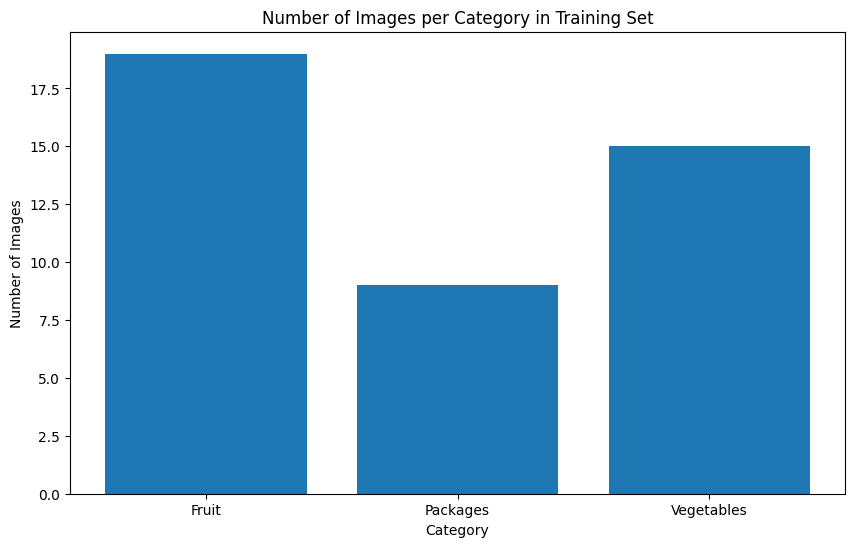

In [11]:
# Conatr imagenes por categoria y subcategoria
category_counts = {}
for category in os.listdir(os.path.join(dataset_path, "train")):
    subcategory_path = os.path.join(dataset_path, "train", category)
    num_images = len(os.listdir(subcategory_path))
    category_counts[category] = num_images

# Mostrar el recuento por categoria
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Number of Images per Category in Training Set")
plt.show()


### 1.5 Distribución de Resoluciones de las Imágenes

Processed dataset\train\Fruit\Avocado\Avocado_001.jpg
Processed dataset\train\Fruit\Avocado\Avocado_002.jpg
Processed dataset\train\Fruit\Avocado\Avocado_003.jpg
Processed dataset\train\Fruit\Avocado\Avocado_004.jpg
Processed dataset\train\Fruit\Avocado\Avocado_005.jpg
Processed dataset\train\Fruit\Avocado\Avocado_006.jpg
Processed dataset\train\Fruit\Avocado\Avocado_007.jpg
Processed dataset\train\Fruit\Avocado\Avocado_008.jpg
Processed dataset\train\Fruit\Avocado\Avocado_009.jpg
Processed dataset\train\Fruit\Avocado\Avocado_010.jpg
Processed dataset\train\Fruit\Avocado\Avocado_011.jpg
Processed dataset\train\Fruit\Avocado\Avocado_012.jpg
Processed dataset\train\Fruit\Avocado\Avocado_013.jpg
Processed dataset\train\Fruit\Avocado\Avocado_014.jpg
Processed dataset\train\Fruit\Avocado\Avocado_015.jpg
Processed dataset\train\Fruit\Avocado\Avocado_016.jpg
Processed dataset\train\Fruit\Avocado\Avocado_017.jpg
Processed dataset\train\Fruit\Avocado\Avocado_018.jpg
Processed dataset\train\Frui

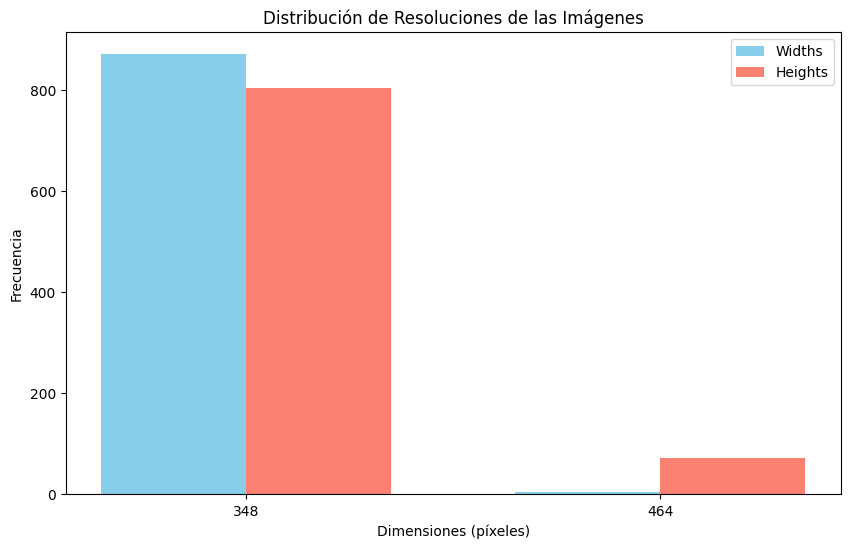

In [14]:
# Definir categorías y subcategorías en el dataset
categories = ["Fruit", "Vegetables"]
subcategories = {
    "Fruit": ["Avocado", "Banana", "Kiwi", "Lemon", "Lime", "Mango", "Nectarine", "Orange", "Papaya", "Passion-Fruit", "Peach", "Pineapple", "Plum", "Pomegranate", "Red-Grapefruit", "Satsumas"],
    "Vegetables": ["Asparagus", "Aubergine", "Brown-Cap-Mushroom", "Cabbage", "Carrots", "Cucumber", "Garlic", "Ginger", "Leek", "Red-Beet", "Zucchini"],
}

# Construye la lista para almacenar las resoluciones de cada imagen
resolutions = []
dataset_path = "dataset"

# Recorrer las carpetas de categorías y subcategorías para extraer las resoluciones de las imágenes
for category in categories:
    for sub_category in subcategories[category]:
        sub_category_path = os.path.join(dataset_path, "train", category, sub_category)
        if os.path.exists(sub_category_path):
            for image_file in os.listdir(sub_category_path):
                image_path = os.path.join(sub_category_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        resolutions.append(img.size)
                        print(f"Processed {image_path}")
                except FileNotFoundError:
                    print(f"Image not found: {image_path}")
                except PermissionError:
                    print(f"Permission denied: {image_path}")

# Visualización de resoluciones con barras separadas
if resolutions:
    widths, heights = zip(*resolutions)

    # Definir los bins únicos combinando anchos y alturas
    bins = sorted(set(widths + heights))
    
    # Contar frecuencias de cada valor en bins para anchos y alturas
    width_counts = [widths.count(bin_value) for bin_value in bins]
    height_counts = [heights.count(bin_value) for bin_value in bins]
    
    # Ancho de las barras
    bar_width = 0.35

    # Posiciones para las barras de anchos y alturas
    x = np.arange(len(bins))
    
    # Graficar barras
    plt.figure(figsize=(10, 6))
    plt.bar(x - bar_width / 2, width_counts, width=bar_width, label='Widths', color='skyblue')
    plt.bar(x + bar_width / 2, height_counts, width=bar_width, label='Heights', color='salmon')

    # Configurar etiquetas y título
    plt.xlabel('Dimensiones (píxeles)')
    plt.ylabel('Frecuencia')
    plt.xticks(x, bins)
    plt.legend()
    plt.title('Distribución de Resoluciones de las Imágenes')
    plt.show()

**Análisis de Resoluciones en Ancho (Widths):** La mayoría de las imágenes tienen un ancho de 348 píxeles. Esto indica una gran consistencia en el ancho de las imágenes en el dataset, lo cual es positivo para el entrenamiento de modelos de visión por computadora, ya que reduce la necesidad de redimensionar o normalizar en esta dimensión.

**Análisis de Resoluciones en Alto (Heights):** La altura de las imágenes muestra dos valores distintos: la mayoría de las imágenes tienen una altura de 348 píxeles (similar al ancho), mientras que un pequeño número de imágenes tiene una altura de 464 píxeles.

**Siguiente Paso:** Redimensionar las imágenes a una resolución común usando una técnica de preprocesamiento o ignorar el subconjunto pequeño de imágenes con altura mayor si no afecta significativamente la representación de las categorías.

### 1.6 Distribución de Formatos de Imagen en el Dataset

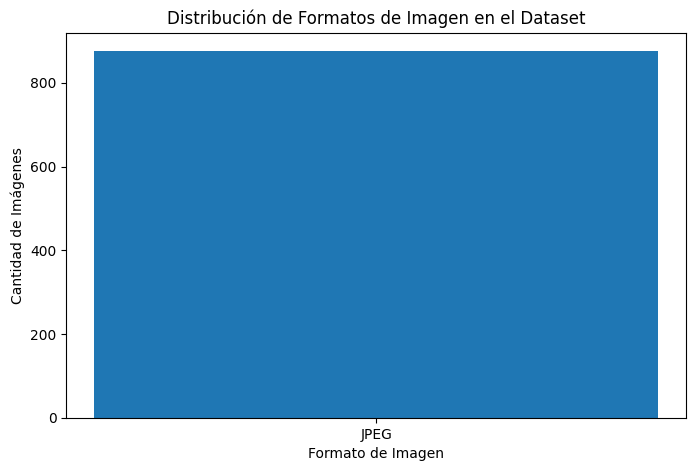

In [15]:
# Definir categorías y subcategorías en el dataset
categories = ["Fruit", "Vegetables"]
subcategories = {
    "Fruit": ["Avocado", "Banana", "Kiwi", "Lemon", "Lime", "Mango", "Nectarine", "Orange", "Papaya", "Passion-Fruit", "Peach", "Pineapple", "Plum", "Pomegranate", "Red-Grapefruit", "Satsumas"],
    "Vegetables": ["Asparagus", "Aubergine", "Brown-Cap-Mushroom", "Cabbage", "Carrots", "Cucumber", "Garlic", "Ginger", "Leek", "Red-Beet", "Zucchini"],
}

# Define el path al dataset
dataset_path = "dataset"

# Inicializa la lista para almacenar los formatos de las imágenes
formats = []

# Recorre las categorías y subcategorías para obtener los formatos
for category in categories:
    for sub_category in subcategories[category]:
        sub_category_path = os.path.join(dataset_path, "train", category, sub_category)
        if os.path.exists(sub_category_path):  # Verifica si la subcategoría existe
            for image_file in os.listdir(sub_category_path):
                image_path = os.path.join(sub_category_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        formats.append(img.format)  # Agrega el formato de la imagen a la lista
                except Exception as e:
                    print(f"Error al abrir {image_path}: {e}")

# Contar formatos de imagen
format_counts = {fmt: formats.count(fmt) for fmt in set(formats)}
plt.figure(figsize=(8, 5))
plt.bar(format_counts.keys(), format_counts.values())
plt.xlabel("Formato de Imagen")
plt.ylabel("Cantidad de Imágenes")
plt.title("Distribución de Formatos de Imagen en el Dataset")
plt.show()


### 1.7 Distribución de Imágenes en Conjuntos de Datos (Entrenamiento, Validación, Prueba)

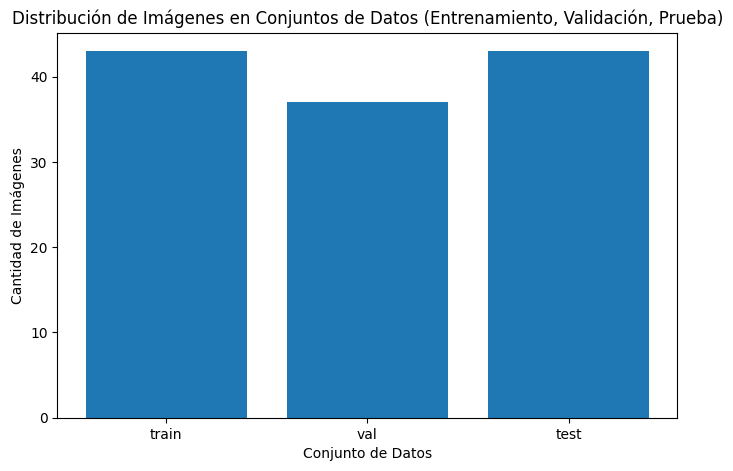

In [16]:
# Conteo de imágenes por conjunto
sets = ["train", "val", "test"]
set_counts = {}

for set_name in sets:
    set_path = os.path.join(dataset_path, set_name)
    total_images = sum([len(os.listdir(os.path.join(set_path, category))) for category in os.listdir(set_path)])
    set_counts[set_name] = total_images

plt.figure(figsize=(8, 5))
plt.bar(set_counts.keys(), set_counts.values())
plt.xlabel("Conjunto de Datos")
plt.ylabel("Cantidad de Imágenes")
plt.title("Distribución de Imágenes en Conjuntos de Datos (Entrenamiento, Validación, Prueba)")
plt.show()

### 1.8 Técnicas de Aumento de Datos

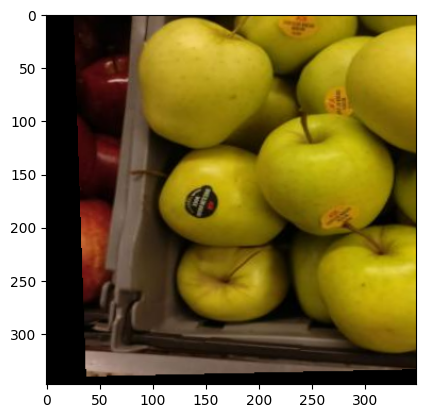

In [17]:
# Aplicar aumento de datos usando ImageDataGenerator de Keras
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'  # Usa un color constante en lugar de 'nearest'
)

# Cargar imagen suando PIL y convertirla a un array
sample_image_path = "dataset/train/Fruit/Apple/Golden-Delicious/Golden-Delicious_003.jpg"
with Image.open(sample_image_path) as img:
    img = img.convert("RGB")
    img_array = np.array(img)

# Reimensiona el array para el generador
img_array = img_array.reshape((1,) + img_array.shape)

# Usar el generador de data para aumentar la imagen
for batch in datagen.flow(img_array, batch_size=1):
    plt.figure()
    plt.imshow(batch[0].astype('uint8'))
    break

**Análisis del Aumento de Datos:**

- **Transformaciones Aplicadas:** El generador de aumentos (ImageDataGenerator) aplica una serie de transformaciones a la imagen original, incluyendo rotación, desplazamiento horizontal y vertical, cambio de escala, y volteo horizontal. Estas transformaciones ayudan a diversificar el dataset y permiten que el modelo sea más robusto frente a variaciones en la posición, orientación y escala de los objetos.

- **Uso de fill_mode='constant':** Se ha configurado el fill_mode en constant, lo cual rellena las áreas fuera de los límites originales de la imagen con un color uniforme (negro en este caso). Esto evita las distorsiones visibles en los bordes que ocurren cuando se usa nearest, pero puede introducir áreas negras en las imágenes, lo que podría o no ser deseable dependiendo del contexto.

**Conclusiones:**

- **Mayor Variabilidad en los Datos:** Las transformaciones aplicadas crean variaciones de la imagen original, lo que permite al modelo generalizar mejor al ver los objetos en diferentes posiciones y escalas.
- **Sugerencia para Ajustes:** Dependiendo de los resultados, se puede intentar experimentar con otros valores de fill_mode o ajustes de los parámetros de transformación para maximizar la utilidad del aumento de datos sin introducir artefactos indeseados (como las áreas negras).

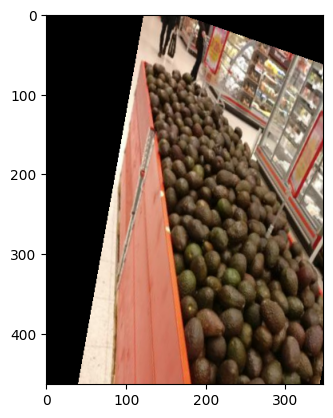

In [18]:
# Load the image using PIL and convert it to an array
sample_image_path = "dataset/train/Fruit/Avocado/Avocado_003.jpg"
with Image.open(sample_image_path) as img:
    img = img.convert("RGB")
    img_array = np.array(img)

# Reshape the array for the generator
img_array = img_array.reshape((1,) + img_array.shape)

# Use the data generator to augment the image
for batch in datagen.flow(img_array, batch_size=1):
    plt.figure()
    plt.imshow(batch[0].astype('uint8'))
    break

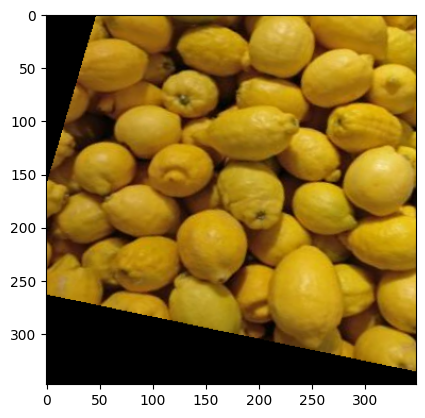

In [19]:
# Load the image using PIL and convert it to an array
sample_image_path = "dataset/train/Fruit/Lemon/Lemon_003.jpg"
with Image.open(sample_image_path) as img:
    img = img.convert("RGB")
    img_array = np.array(img)

# Reshape the array for the generator
img_array = img_array.reshape((1,) + img_array.shape)

# Use the data generator to augment the image
for batch in datagen.flow(img_array, batch_size=1):
    plt.figure()
    plt.imshow(batch[0].astype('uint8'))
    break